# Exercise session nº 2
---
# Sonic Hedgehog Signaling Gradient Readout in the Vertebrate Neural Tube

__*Nicolas Ecker, 30/01/23, ENS Paris*__

__*taken and adapted from a preparation by Sacha Ichbiah, 2022*__

This subject is taken from : 
> N. Balaskas et Al., *Gene Regulatory Logic for Reading the Sonic Hedgehog Signaling Gradient in the Vertebrate Neural Tube*, Cell, 2012.
> https://doi.org/10.1016/j.cell.2011.10.047

Secreted signaling proteins, known as morphogens, provide the positional information that organizes gene expression and cellular differentiation in many developing tissues. Several morphogens gradients can be observed in biological systems during development. However, the way the cells integrate a given signal is often complicated and organism-dependent. A simple model introduced by __Lewis Wolpert__, called the __French flag model__, postulates that the different cell fates that can be adopted are the result of the crossing of thresholds of morphogens concentrations. 

<img src="Images/French_flag_model.png" alt="drawing" width="500"/>

In the vertebrate neural tube, Sonic Hedgehog (Shh) acts as a morphogen to control the pattern of neuronal subtype specification. However, it was not clear how the Shh gradient was interpreted by the cell to induce different cell fates. This article shows that a spatially and temporally changing gradient of Shh signaling is interpreted by the regulatory logic of a downstream transcriptional network. The design of this network, which links three transcription factors to Shh signaling, is responsible for differential (spatial and temporal) gene expression. In addition, the network renders cells insensitive to fluctuations in signaling and shows hysteresis - a "memory" of the signal, where its past stength can influence the steady state. The morphogen interpretation is an emergent property of the architecture of a transcriptional network that provides robustness and reliability to tissue patterning.

![alt text](Images/Graphical_abstract.jpeg "Title")

During this session, we will model the gene regulation network using differential equations and observe the behaviour induced by the architecture of this network. 

---

## I - Temporal evolution of the GRN : 
![alt text](Images/GRN.png "Title")

The relations between these proteins can be modeled as such : 

$
\begin{align}
\frac{dP}{dt} &=\frac{\alpha}{1 + (\frac{N}{N_{critP}})^{h_1} +  (\frac{O}{O_{critP}})^{h_2}  } - k_1P \newline
\frac{dO}{dt} &=\frac{\beta G}{1 + G} \frac{1}{1 + (\frac{N}{N_{critO}})^{h_3}  } - k_2O \newline
\frac{dN}{dt} &=\frac{\gamma G}{1 + G} \frac{1}{1 + (\frac{O}{O_{critN}})^{h_4} + (\frac{P}{P_{critN}})^{h_5}  } - k_3N \newline
\end{align}
$

#### **Question 1 :**
> Discretize these differential equations with a forward euler-scheme

$
\begin{align}
P(t+dt) &= P(t)(1-k_1dt) + dt \frac{\alpha}{1 + (\frac{N(t)}{N_{critP}})^{h_1} +  (\frac{O(t)}{O_{critP}})^{h_2}  } \newline
O(t+dt) &= O(t)(1-k_2dt) + dt \frac{\beta G}{1 + G} \frac{1}{1 + (\frac{N(t)}{N_{critO}})^{h_3}  }   \newline
N(t+dt) &= N(t)(1-k_3dt) + dt \frac{\gamma G}{1 + G} \frac{1}{1 + (\frac{O(t)}{O_{critN}})^{h_4} + (\frac{P(t)}{P_{critN}})^{h_5}  } \newline
\end{align}
$

#### **Question 2 :**
> Integrate these equations for the given parameters for $t \in [0,50]$, starting with $P(0)=3, O(0)=N(0)=0$. Try with G $\in [1,2,3,4,5]$ What do you observe ? 

## The steady states values of O,P,N change with the morphogen signal strength G. Specifically, the dominant protein in the steady state depends on G.

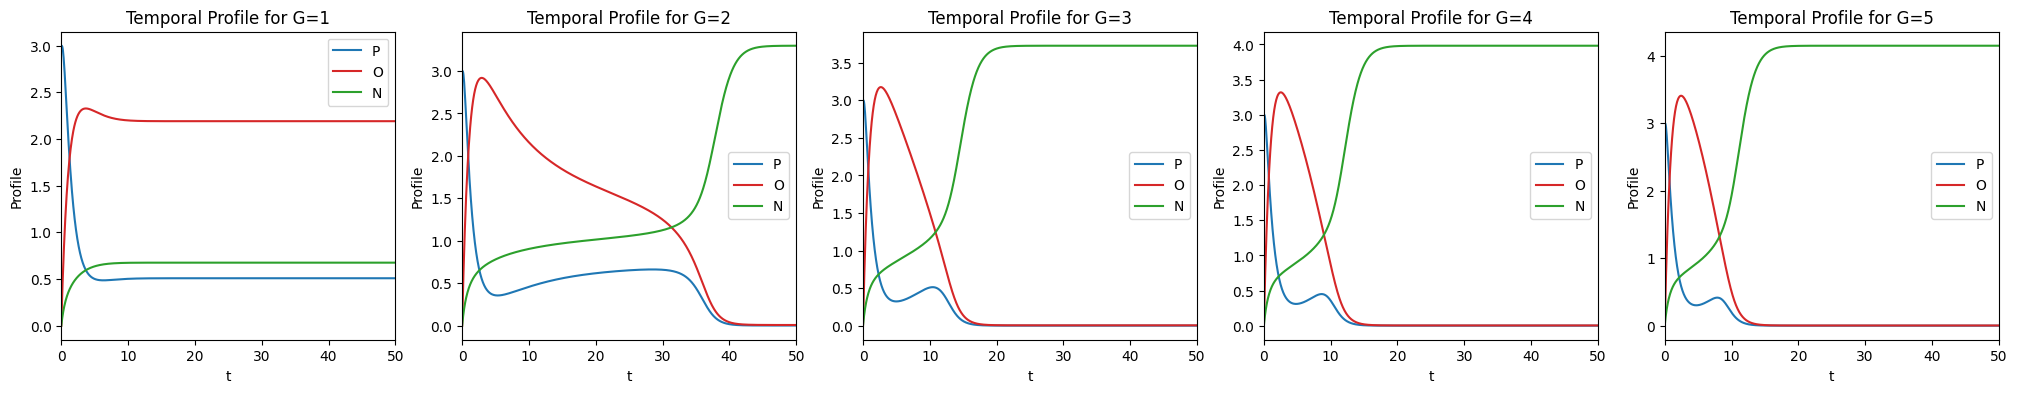

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

alpha = 3 
beta = 5
gamma = 5
h1 = 6
h2 = 2
h3 = 5
h4 = 1
h5 = 1
k1 = 1
k2 = 1
k3 = 1
OcritP = 1
NcritP = 1
NcritO = 1
PcritN = 1

tfinal = 50
npoints = 1000
timepoints = np.linspace(0,tfinal,npoints)

dt = tfinal / npoints

GVals = [1,2,3,4,5]

fig, ax = plt.subplots(1,5,figsize = (25,4))

P0 = 3
O0 = 0
N0 = 0


for i,G in enumerate(GVals) :

    P = np.zeros(npoints)
    O = np.zeros(npoints)
    N = np.zeros(npoints)
    
    for t in range(npoints) :
        if (t==0) :
            P[t] = P0
            O[t] = O0
            N[t] = N0
            continue
   
        P[t] = P[t-1]*(1-k1*dt) + dt* (alpha)/( 1 + N[t-1]**h1 + O[t-1]**h2  )
        O[t] = O[t-1]*(1-k2*dt) + dt* (beta*G)/(1+G)/(1 + N[t-1]**h3)
        N[t] = N[t-1]*(1-k3*dt) + dt* (gamma*G)/(1+G)/(1 + O[t-1]**h4 + P[t-1]**h5)
        
    ax[i].plot(timepoints,P,color='tab:blue', label='P')
    ax[i].plot(timepoints,O,color='tab:red', label='O')
    ax[i].plot(timepoints,N,color='tab:green', label='N')    
    ax[i].set_title('Temporal Profile for G=' + str(G))
    ax[i].set_xlabel('t')
    ax[i].set_ylabel('Profile')
    ax[i].set_xlim(0,50)
    ax[i].legend()
        
        

## II - Phase diagram of the GRN : 
#### **Question 3 :**
> Plot the phase diagram of the steady states values of P,O and N for G $\in G_{vals}$. Then plot the phase diagram for $\alpha = 0, \beta=0 \text{ and } (\alpha,\beta)=0$

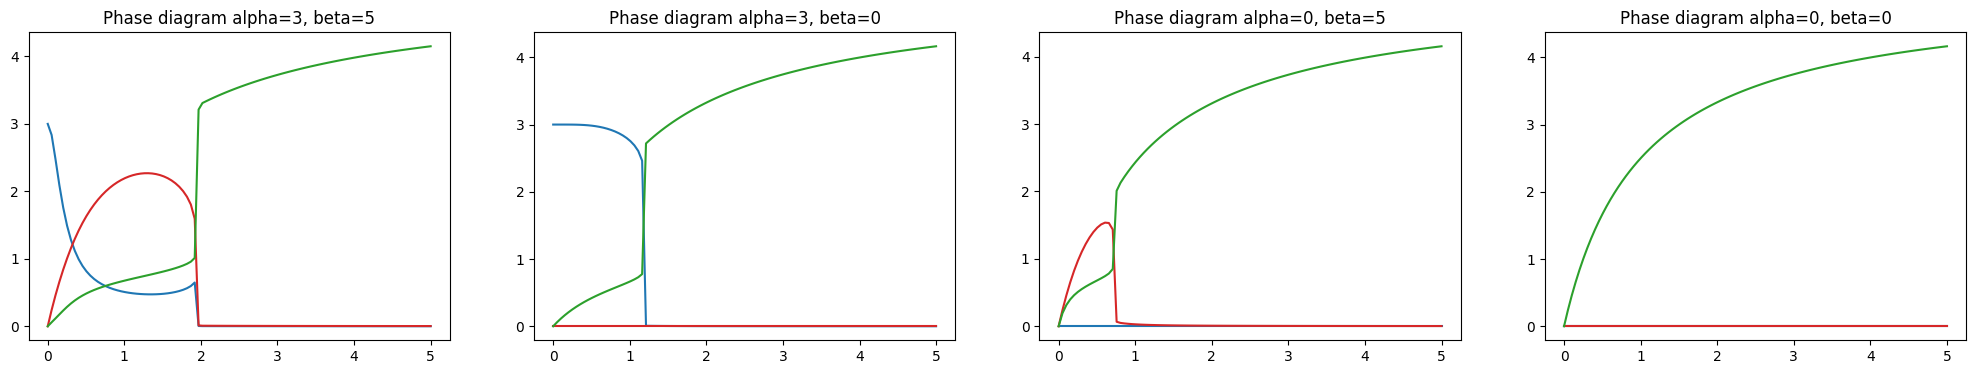

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

alpha = 3 
beta = 5
gamma = 5
h1 = 6
h2 = 2
h3 = 5
h4 = 1
h5 = 1
k1 = 1
k2 = 1
k3 = 1
OcritP = 1
NcritP = 1
NcritO = 1
PcritN = 1

tfinal = 50
timepoints = np.linspace(0,tfinal,npoints)

npoints = 1000
dt = tfinal / npoints

n_gvals = 100
Gvals = np.linspace(0,5,n_gvals)

PSteady = np.zeros(n_gvals)
OSteady = np.zeros(n_gvals)
NSteady = np.zeros(n_gvals)

params = [(3,5),(3,0),(0,5),(0,0)];

fig,ax = plt.subplots(1,4, figsize=(25,4))

for ff,(alpha,beta) in enumerate(params) :
    for i,G in enumerate(Gvals):
        
        tfinal = 50
        npoints = 1000

        dt = tfinal / npoints
        timepoints = np.linspace(0,tfinal,npoints)

        P = np.zeros(npoints)
        O = np.zeros(npoints)
        N = np.zeros(npoints)

        for t in range(npoints) :
            if (t==0) :
                P[t] = P0
                O[t] = O0
                N[t] = N0
                continue

            P[t] = P[t-1]*(1-k1*dt) + dt* (alpha)/( 1 + N[t-1]**h1 + O[t-1]**h2  )
            O[t] = O[t-1]*(1-k2*dt) + dt* (beta*G)/(1+G)/(1 + N[t-1]**h3)
            N[t] = N[t-1]*(1-k3*dt) + dt* (gamma*G)/(1+G)/(1 + O[t-1]**h4 + P[t-1]**h5)

        PSteady[i] = P[-1]
        OSteady[i] = O[-1]
        NSteady[i] = N[-1]

    ax[ff].plot(Gvals,PSteady,color='tab:blue')
    ax[ff].plot(Gvals,OSteady,color='tab:red')
    ax[ff].plot(Gvals,NSteady,color='tab:green')
    ax[ff].set_title('Phase diagram alpha='+ str(alpha)+ ', beta=' + str(beta))

## Bonus: Numerical accuracy
By default, there is no guarantee that our numerical approximation is indeed correct. In this snippet, we compare the steady state values in the phase diagram above with the same results obtained at one tenth of the time step size. By doing so, we can see how big the error in our approximation is. For a simple differential equation such as the one provided which only depends on time, in principle the numerical approximation should converge to the real solution for infinitely small time steps

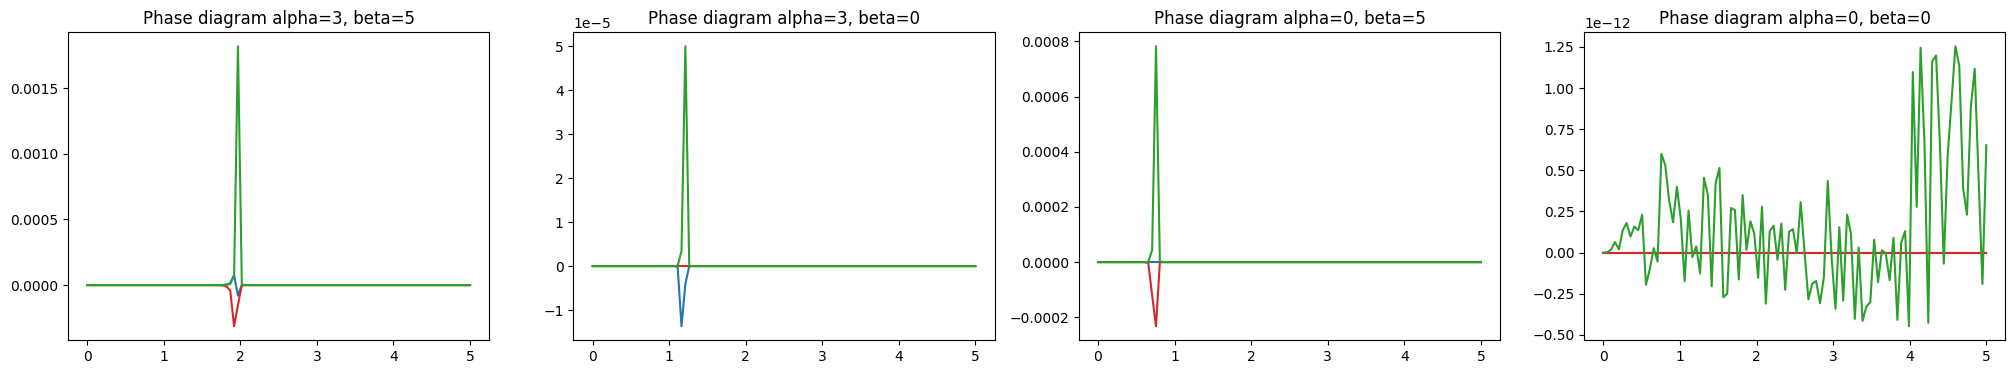

In [3]:
n_gvals = 100
Gvals = np.linspace(0,5,n_gvals)
Ps = np.zeros(n_gvals)
Os = np.zeros(n_gvals)
Ns = np.zeros(n_gvals)

params = [(3,5),(3,0),(0,5),(0,0)];

fig,ax = plt.subplots(1,4, figsize=(25,4))

for ff,(alpha,beta) in enumerate(params) :
    for i,G in enumerate(Gvals):
        
        tfinal = 50
        npoints = 1000

        dt = tfinal / npoints
        timepoints = np.linspace(0,tfinal,npoints)

        P = np.zeros(npoints)
        O = np.zeros(npoints)
        N = np.zeros(npoints)

        for t in range(npoints) :
            if (t==0) :
                P[t] = P0
                O[t] = O0
                N[t] = N0
                continue

            P[t] = P[t-1]*(1-k1*dt) + dt* (alpha)/( 1 + N[t-1]**h1 + O[t-1]**h2  )
            O[t] = O[t-1]*(1-k2*dt) + dt* (beta*G)/(1+G)/(1 + N[t-1]**h3)
            N[t] = N[t-1]*(1-k3*dt) + dt* (gamma*G)/(1+G)/(1 + O[t-1]**h4 + P[t-1]**h5)

        Ps[i] = P[-1]
        Os[i] = O[-1]
        Ns[i] = N[-1]
        
        
        tfinal = 50
        npoints = 100000

        dt = tfinal / npoints
        timepoints = np.linspace(0,tfinal,npoints)
        
        
        P = np.zeros(npoints)
        O = np.zeros(npoints)
        N = np.zeros(npoints)

        for t in range(npoints) :
            if (t==0) :
                P[t] = P0
                continue

            P[t] = P[t-1]*(1-k1*dt) + dt* (alpha)/( 1 + N[t-1]**h1 + O[t-1]**h2  )
            O[t] = O[t-1]*(1-k2*dt) + dt* (beta*G)/(1+G)/(1 + N[t-1]**h3)
            N[t] = N[t-1]*(1-k3*dt) + dt* (gamma*G)/(1+G)/(1 + O[t-1]**h4 + P[t-1]**h5)

        Ps[i] -= P[-1]
        Os[i] -= O[-1]
        Ns[i] -= N[-1]

    ax[ff].plot(Gvals,Ps,color='tab:blue')
    ax[ff].plot(Gvals,Os,color='tab:red')
    ax[ff].plot(Gvals,Ns,color='tab:green')
    ax[ff].set_title('Phase diagram alpha='+ str(alpha)+ ', beta=' + str(beta))

As can be seen, the noise is typically negligible and on the order of $10^{-12}$. Only at the transition points where one protein becomes dominant over the other ones do we get a higher inaccuracy of up to $10^{-3}$, which needs to be kept in mind. 

## III - Noise buffering by the GRN : 
#### **Question 4 :**
> Compare the temporal evolution with $G = 5$ to the one with $G \mapsto \mathcal{N}(5,1)$, where $G$ is chosen from a normal distribution of mean 5 and of variance 1 at every time step.  What are the effects of the noise on the proteins concentrations ? What happens for $G \mapsto \mathcal{N}(2,0.4)$, and why ?

## The solution is robust with respect to a noise level of 20%. However, we saw in the previous section that close to $G=2$, there is a transition of the dominant protein in the system. Noise added there leads to a randomly delayed relaxation, as G can randomly cross the transition point.

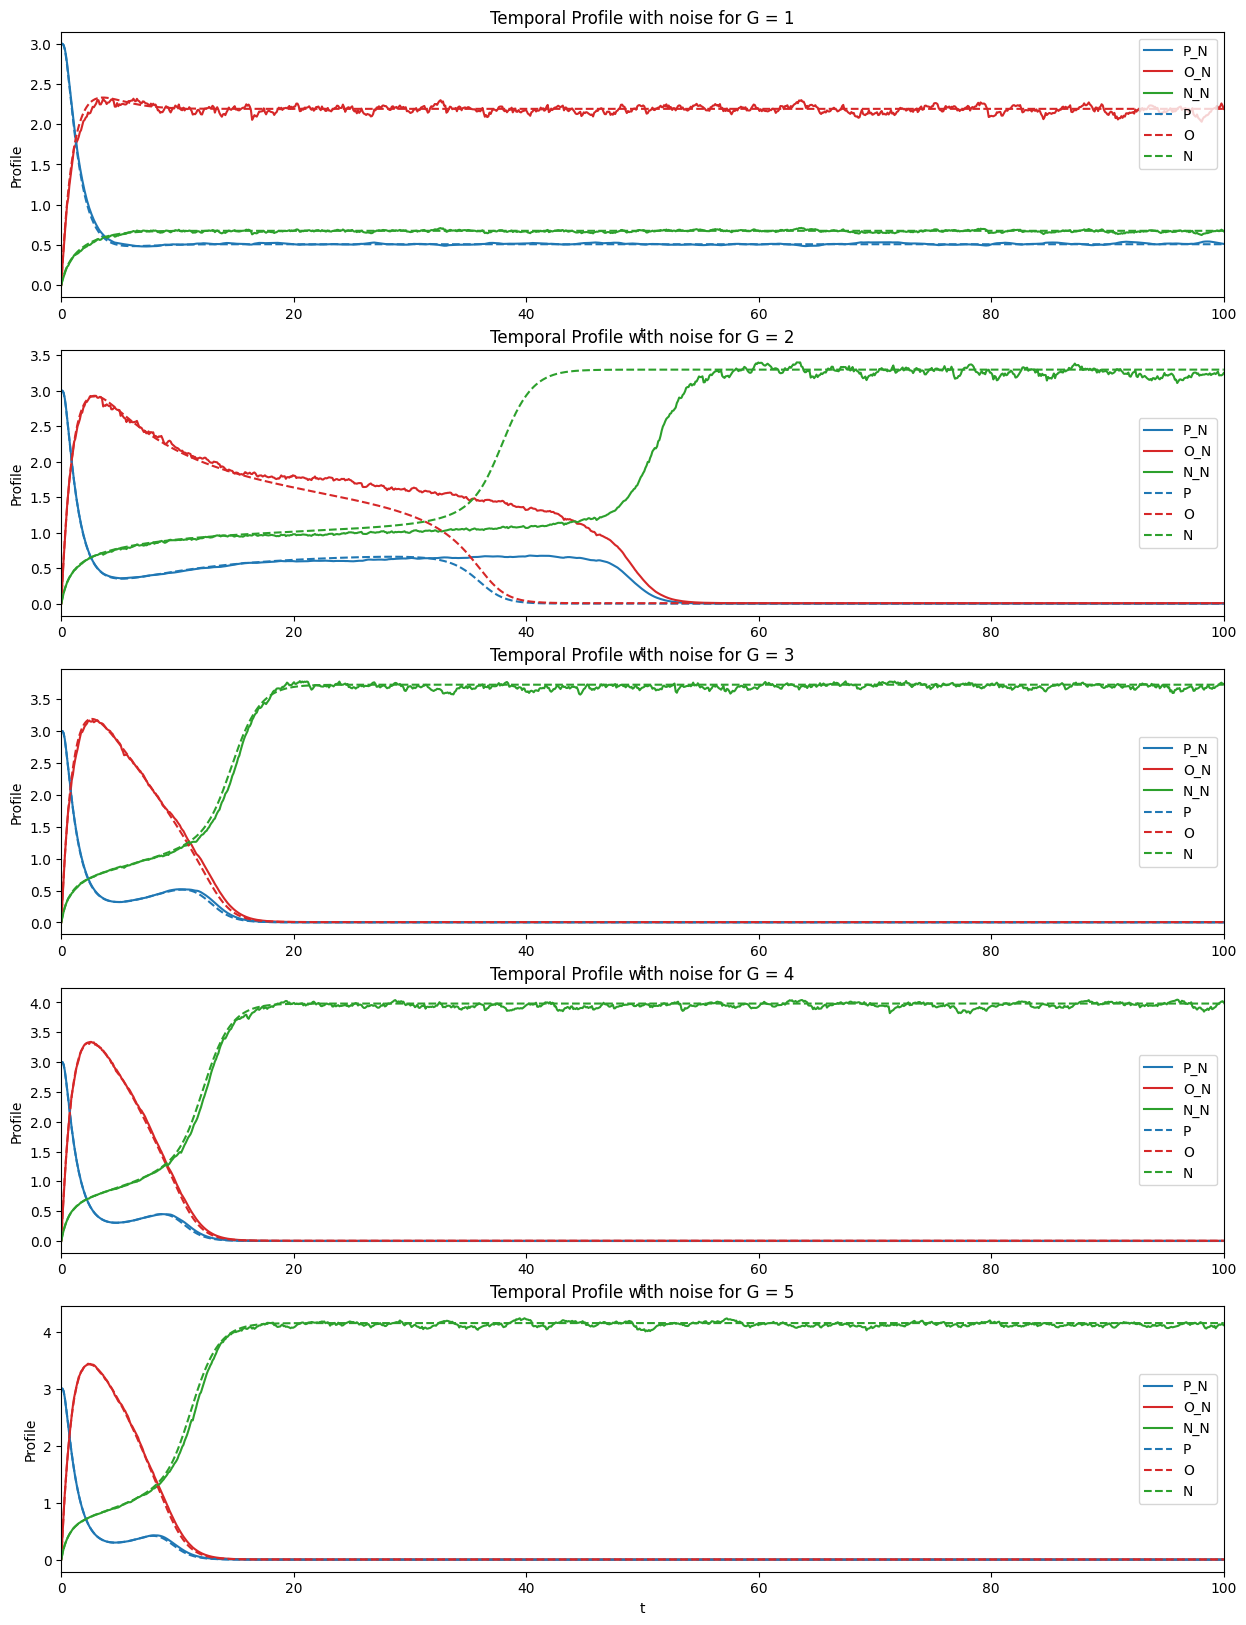

In [4]:
alpha = 3 
beta = 5
gamma = 5
h1 = 6
h2 = 2
h3 = 5
h4 = 1
h5 = 1
k1 = 1
k2 = 1
k3 = 1
OcritP = 1
NcritP = 1
NcritO = 1
PcritN = 1
G_std = 1

tfinal = 100
npoints = 1000
timepoints = np.linspace(0,tfinal,npoints)

dt = tfinal / npoints


GVals = [1,2,3,4,5]

P0 = 3
O0 = 0
N0 = 0

fig, ax = plt.subplots(5,1,figsize = (15,20))

for i,G_mean in enumerate(GVals) :

    P = np.zeros(npoints)
    O = np.zeros(npoints)
    N = np.zeros(npoints)
    
    for t in range(npoints) :
        if (t==0) :
            P[t] = P0
            O[t] = O0
            N[t] = N0
            continue
        G = np.random.normal(G_mean, 0.2*G_mean)    

        P[t] = P[t-1]*(1-k1*dt) + dt* (alpha)/( 1 + N[t-1]**h1 + O[t-1]**h2  )
        O[t] = O[t-1]*(1-k2*dt) + dt* (beta*G)/(1+G)/(1 + N[t-1]**h3)
        N[t] = N[t-1]*(1-k3*dt) + dt* (gamma*G)/(1+G)/(1 + O[t-1]**h4 + P[t-1]**h5)
        
    ax[i].plot(timepoints,P,color='tab:blue', label='P_N')
    ax[i].plot(timepoints,O,color='tab:red', label='O_N')
    ax[i].plot(timepoints,N,color='tab:green', label='N_N')   
    ax[i].set_xlabel('t')
    ax[i].set_ylabel('Profile')
    ax[i].set_xlim(0, tfinal)
    
    P = np.zeros(npoints)
    O = np.zeros(npoints)
    N = np.zeros(npoints)
    
    for t in range(npoints) :
        if (t==0) :
            P[t] = P0
            O[t] = O0
            N[t] = N0
            continue
        G = G_mean    

        P[t] = P[t-1]*(1-k1*dt) + dt* (alpha)/( 1 + N[t-1]**h1 + O[t-1]**h2  )
        O[t] = O[t-1]*(1-k2*dt) + dt* (beta*G)/(1+G)/(1 + N[t-1]**h3)
        N[t] = N[t-1]*(1-k3*dt) + dt* (gamma*G)/(1+G)/(1 + O[t-1]**h4 + P[t-1]**h5)
    
    
    ax[i].plot(timepoints,P,color='tab:blue',linestyle = '--', label='P')
    ax[i].plot(timepoints,O,color='tab:red',linestyle = '--', label='O')
    ax[i].plot(timepoints,N,color='tab:green',linestyle = '--', label='N')   
    ax[i].set_title('Temporal Profile with noise for G = ' + str(G_mean))
    ax[i].legend()

## IV - Hysteresis
#### **Question 5 :**
> From the steady state at G = 0, make G evolve slowly such that the steady state is reached at each variation of G. Then when G = 5, make G decrease back to zero. What do you observe ? 

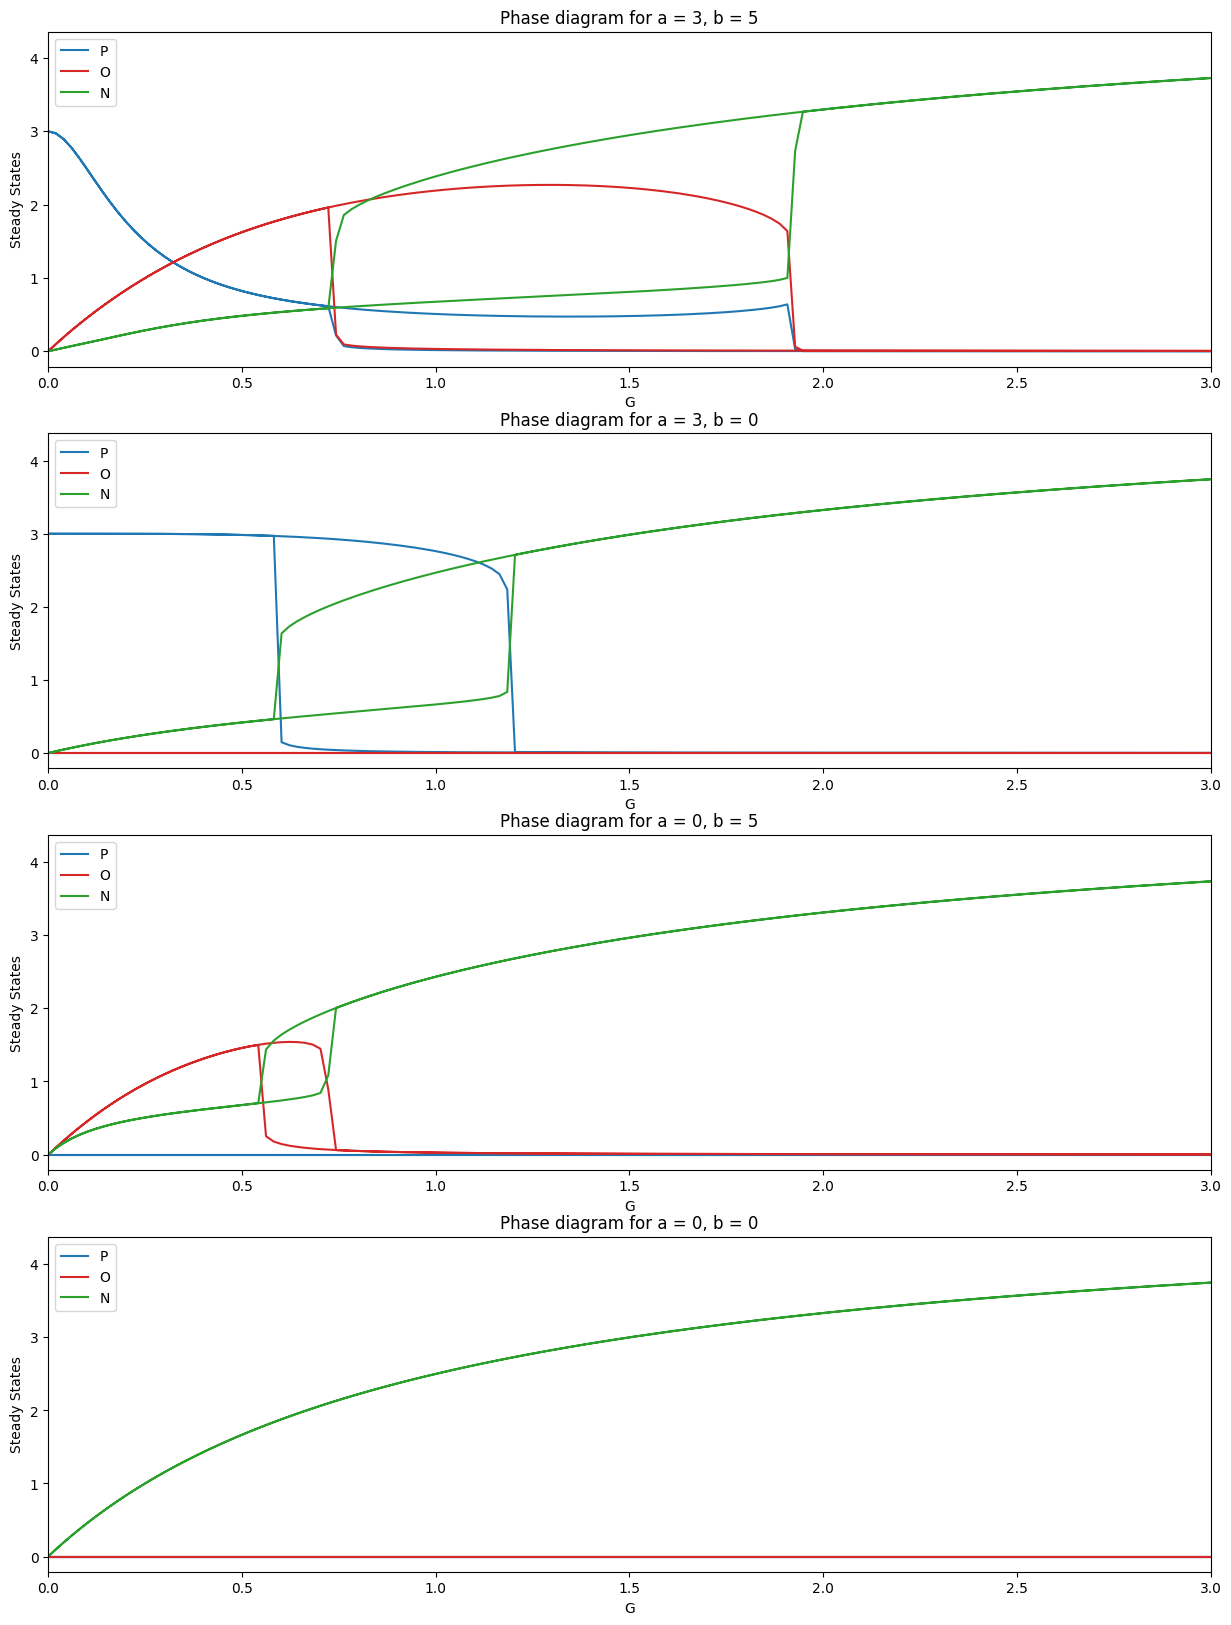

In [8]:
import numpy as np 
import matplotlib.pyplot as plt

alpha = 3 
beta = 5
gamma = 5
h1 = 6
h2 = 2
h3 = 5
h4 = 1
h5 = 1
k1 = 1
k2 = 1
k3 = 1
OcritP = 1
NcritP = 1
NcritO = 1
PcritN = 1

tfinal = 50
timepoints = np.linspace(0,tfinal,npoints)

npoints = 10000
dt = tfinal / npoints

P0 = 3
O0 = 0
N0 = 0

n_gvals = 250
Gvals = np.hstack((np.linspace(0,5,n_gvals)[:-1],np.linspace(5,0,n_gvals)))

PSteady = np.zeros(2*n_gvals-1)
OSteady = np.zeros(2*n_gvals-1)
NSteady = np.zeros(2*n_gvals-1)



params = [(3,5),(3,0),(0,5),(0,0)]

fig, ax = plt.subplots(4,1, figsize = (15,20))

for index,(alpha,beta) in enumerate(params):

    for i,G in enumerate(Gvals) :
        
        P = np.zeros(npoints)
        O = np.zeros(npoints)
        N = np.zeros(npoints)

        for t in range(npoints) :
            if (t==0) :
                if(i==1) :
                    P[t] = P0
                    O[t] = O0
                    N[t] = N0
                else :
                    P[t] = PSteady[i-1]
                    O[t] = OSteady[i-1]
                    N[t] = NSteady[i-1]   
                continue

            P[t] = P[t-1]*(1-k1*dt) + dt* (alpha)/( 1 + N[t-1]**h1 + O[t-1]**h2  )
            O[t] = O[t-1]*(1-k2*dt) + dt* (beta*G)/(1+G)/(1 + N[t-1]**h3)
            N[t] = N[t-1]*(1-k3*dt) + dt* (gamma*G)/(1+G)/(1 + O[t-1]**h4 + P[t-1]**h5)

        PSteady[i] = P[-1]
        OSteady[i] = O[-1]
        NSteady[i] = N[-1]
        
    ax[index].plot(Gvals, PSteady,color='tab:blue', label='P')
    ax[index].plot(Gvals, OSteady,color='tab:red', label='O')
    ax[index].plot(Gvals, NSteady,color='tab:green', label='N') 
    ax[index].set_title('Phase diagram for a = ' + str(alpha) + ', b = ' + str(beta))
    ax[index].set_xlabel('G')
    ax[index].set_ylabel('Steady States')
    ax[index].set_xlim(0,3)
    ax[index].legend()


# Conclusion 

The proposed model provides evidence that Shh morphogen readout in the neural tube is a function of the downstream GNN. Cells transform the extracellular gradient of Shh into a dynamic profile of intracellular Gli activity that engages a transcriptional circuit, the regulatory logic of which is responsible for the generation of the characteristic temporal and spatial patterns of gene expression. This mechanism offers a powerful strategy to achieve the characteristic precision and robustness of morphogen-mediated pattern formation.

In the following part of the article, the authors introduce another model, extending the preceding one by taking into account a forth protein, Gli. It allows them to reproduce the behaviours observed in their in-vivo experiments. On top of explaining the variable spatial patterns of gene expression, the networks confers both robustness and hysteresis of protein production. The insensitivity of the circuit to transient changes in the level of signaling provides a way to achieve reliable patterning in spite of the inherent noisiness of development. The study highlights the information-processing power of transcriptional networks and the simplicity and adaptability of this mechanism suggest that it is likely to be relevant for the control of patterning of tissues other than the neural tube.

The gene regulatory networks encountered in biological systems are often too complicated to construct heuristically. Eric H. Davidson pioneered the use of bioinformatical tools to automatically infer gene regulation networks from genomic and transcriptomic data. It gives an engineer's view of the genes relationships during developments, showing the complexity of the mechanisms involved.

<img src="Images/GRN_davidson.png" alt="drawing" width="500"/>

> Gene regulation network for endomesoderm specification made with biotapestry : http://www.biotapestry.org. Don't try to understand this graph !

_Additional references :_
> Michael Akam, *Making stripes ineleganty*, Nature, 1989. https://doi.org/10.1038/341282a0

> Eric H. Davidson, *Emerging properties of animal gene regulatory networks*, Nature, 2010. https://doi.org/10.1038/nature09645

> Eric H. Davidson, Samuel Levine *Properties of developmental gene regulatory networks*, PNAS, 2008 https://doi.org/10.1073/pnas.0806007105

> Lewis Wolpert, *Positional information and the spatial pattern of cellular differentiation*, Journal of Theoretical Biology, 1969. https://doi.org/10.1016/S0022-5193(69)80016-0